In [213]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from scipy.stats import pointbiserialr, ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [215]:
OG = pd.read_csv("train_ZoGVYWq.csv")

In [217]:
OG.describe(include='all')

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853,79853,79853.000000,79853.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Urban,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43134,48183,NaN,NaN
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,NaN,NaN,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,NaN,NaN,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,NaN,NaN,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,NaN,NaN,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,NaN,NaN,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,NaN,NaN,13800.000000,1.000000


In [219]:
OG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  rene

In [221]:
# Show duplicate records
OG[OG.duplicated()]


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal


In [223]:
OG[OG.duplicated(subset=['perc_premium_paid_by_cash_credit', 
                      'age_in_days', 
                      'Income', 
                      'Count_3-6_months_late', 
                      'Count_6-12_months_late',
                      'Count_more_than_12_months_late',
                      'application_underwriting_score',
                      'no_of_premiums_paid',
                      'sourcing_channel',
                      'residence_area_type',
                      'premium',
                      'renewal'])]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal


In [225]:
OG.shape

(79853, 13)

In [227]:
OG.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [229]:
missing_cols = OG.columns[OG.isnull().any()].tolist()
missing_cols

['Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score']

In [231]:
all_missing_records = OG[OG[missing_cols].isnull().all(axis=1)]
print("Rows where ALL missing columns are NaN:", len(all_missing_records))

Rows where ALL missing columns are NaN: 73


In [233]:
OG['Count_3-6_months_late'].value_counts(dropna=False)

Count_3-6_months_late
0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
NaN        97
6.0        68
7.0        23
8.0        15
9.0         4
13.0        1
12.0        1
11.0        1
10.0        1
Name: count, dtype: int64

In [235]:
OG['Count_6-12_months_late'].value_counts(dropna=False)

Count_6-12_months_late
0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
NaN        97
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
11.0        2
14.0        2
13.0        2
17.0        1
15.0        1
12.0        1
Name: count, dtype: int64

In [237]:
OG['Count_more_than_12_months_late'].value_counts(dropna=False)

Count_more_than_12_months_late
0.0     76038
1.0      2996
2.0       498
3.0       151
NaN        97
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: count, dtype: int64

In [239]:
OG['application_underwriting_score'].value_counts(dropna=False)

application_underwriting_score
NaN      2974
99.89    1972
99.88    1343
99.87     856
99.86     693
         ... 
94.07       1
92.71       1
92.50       1
92.85       1
93.57       1
Name: count, Length: 673, dtype: int64

In [241]:
# Create a copy of OG for processing
OG_proc = OG.copy()

# Convert age from days to years (integer)
OG_proc['age_in_years'] = (OG_proc['age_in_days'] / 365).astype(int)
# Drop the original age_in_days column
OG_proc = OG_proc.drop(columns=['age_in_days'])
# Drop the ID column from OG_proc
OG_proc = OG_proc.drop(columns=['id'])


In [243]:
OG_proc.shape

(79853, 12)

In [245]:
OG_proc_outlier_handled = OG_proc.copy()

In [247]:
OG_proc_outlier_handled.describe()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,age_in_years
count,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,0.314288,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410,51.607404
std,0.334915,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226,14.270484
min,0.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000,21.000000
25%,0.034000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000,41.000000
50%,0.167000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000,51.000000
75%,0.538000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000,62.000000
max,1.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000,103.000000


In [249]:
# Define target
target_col = 'renewal'

# Extract categorical & numerical columns from OG_proc
cat_cols = OG_proc.select_dtypes(include=['object']).columns.tolist()
num_cols = OG_proc.select_dtypes(include=['int64', 'float64']).columns.drop(target_col).tolist()


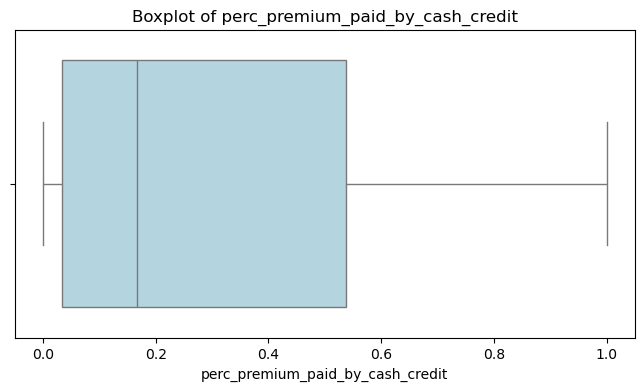

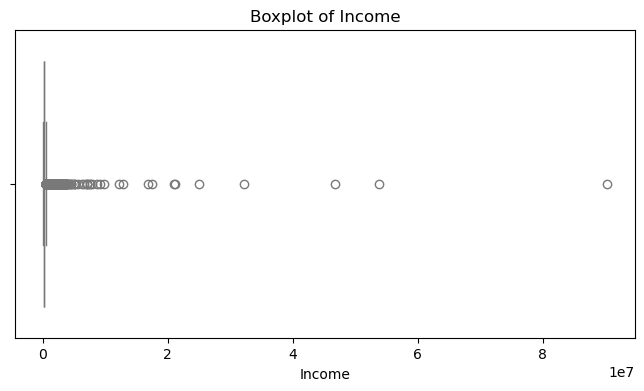

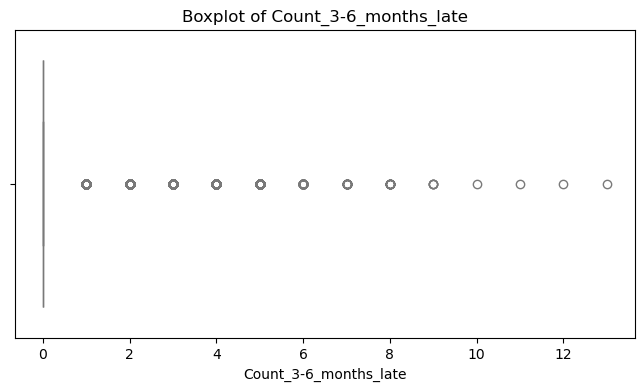

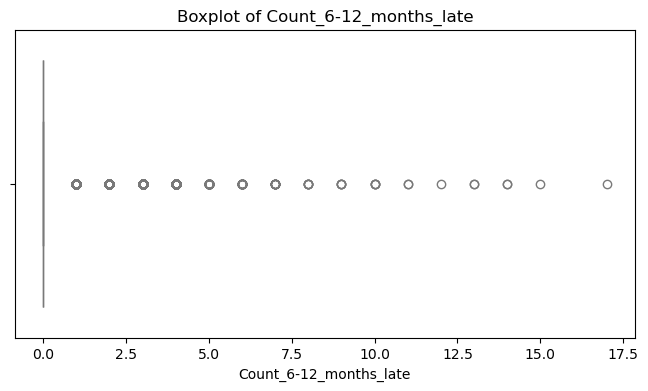

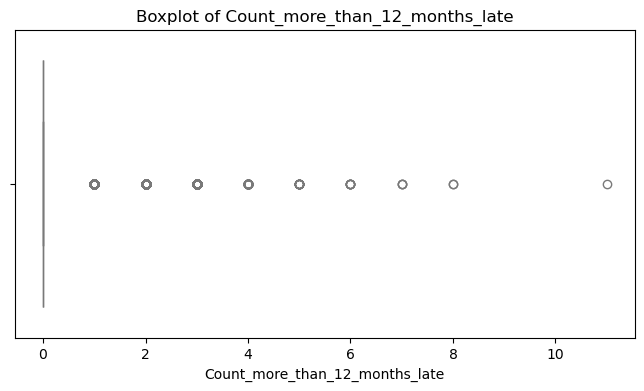

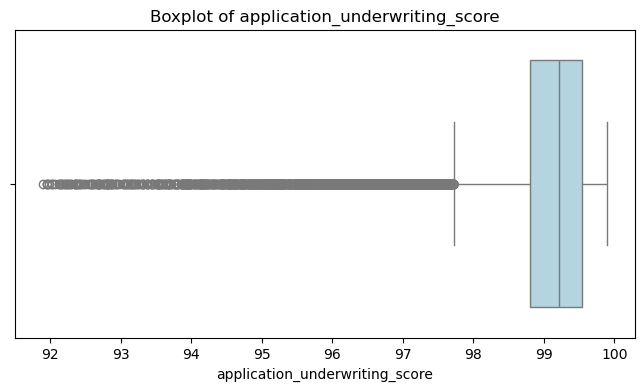

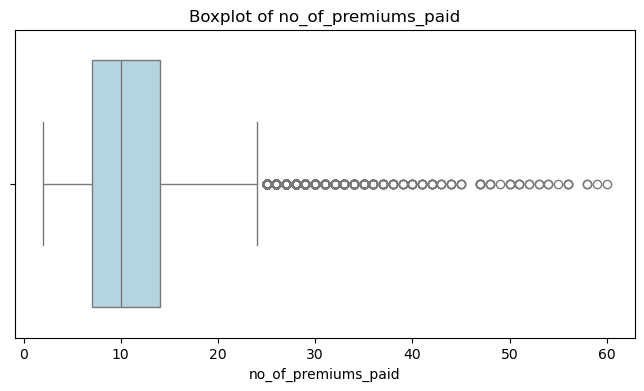

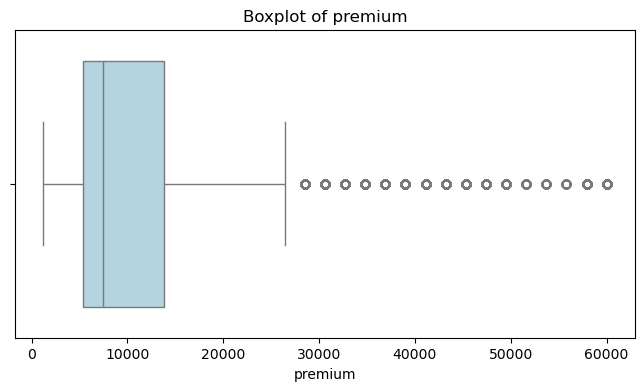

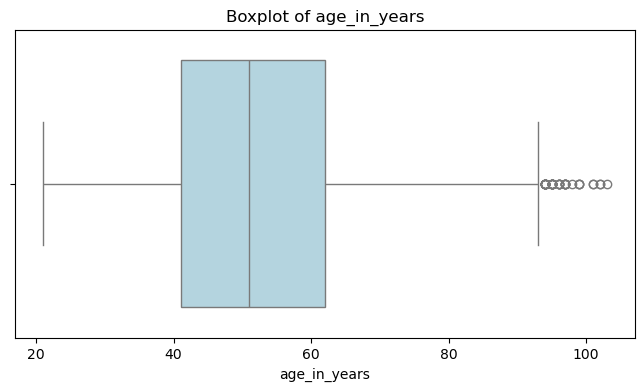

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=OG_proc[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [253]:
outliers_dict = {}

for col in num_cols:
    Q1 = OG_proc[col].quantile(0.25)
    Q3 = OG_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Extract outlier rows
    outlier_rows = OG_proc.loc[
        (OG_proc[col] < lower) | (OG_proc[col] > upper), col
    ]
    
    # Store info
    outliers_dict[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "distinct_vals": np.sort(outlier_rows.unique()),
        "num_distinct": outlier_rows.nunique(),
        "num_outliers": outlier_rows.shape[0]
    }

# Display results
for col, info in outliers_dict.items():
    print(f"\n{col}:")
    print(f"  Lower Bound = {info['lower_bound']:.2f}, Upper Bound = {info['upper_bound']:.2f}")
    print(f"  Outliers → {info['num_outliers']} rows ({info['num_distinct']} distinct values)")
    print(f"  Example values: {info['distinct_vals'][:20]}")  # show first 20 if too many


perc_premium_paid_by_cash_credit:
  Lower Bound = -0.72, Upper Bound = 1.29
  Outliers → 0 rows (0 distinct values)
  Example values: []

Income:
  Lower Bound = -108110.00, Upper Bound = 468210.00
  Outliers → 3428 rows (2233 distinct values)
  Example values: [468280 468320 468520 468870 468920 469080 469140 469180 469240 469310
 469360 469550 469600 469620 469830 469840 469920 469990 470020 470040]

Count_3-6_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 12955 rows (13 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]

Count_6-12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3925 rows (16 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 17.]

Count_more_than_12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3718 rows (9 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8. 11.]

application_underwriting_score:
  Lower Boun

In [255]:

for col in num_cols:
    Q1 = OG_proc_outlier_handled[col].quantile(0.25)
    Q3 = OG_proc_outlier_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Mark outliers as NaN
    OG_proc_outlier_handled.loc[
        (OG_proc_outlier_handled[col] < lower) | 
        (OG_proc_outlier_handled[col] > upper), col
    ] = np.nan

print("NaNs introduced after outlier marking:\n", OG_proc_outlier_handled[num_cols].isna().sum())

NaNs introduced after outlier marking:
 perc_premium_paid_by_cash_credit        0
Income                               3428
Count_3-6_months_late               13052
Count_6-12_months_late               4022
Count_more_than_12_months_late       3815
application_underwriting_score       6355
no_of_premiums_paid                  1426
premium                              4523
age_in_years                           44
dtype: int64


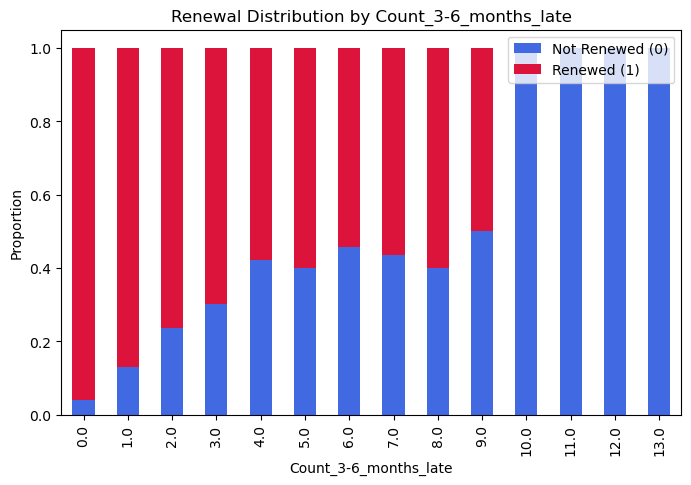


=== Crosstab for Count_3-6_months_late ===
renewal                    0      1
Count_3-6_months_late              
0.0                    0.039  0.961
1.0                    0.131  0.869
2.0                    0.235  0.765
3.0                    0.302  0.698
4.0                    0.422  0.578
5.0                    0.399  0.601
6.0                    0.456  0.544
7.0                    0.435  0.565
8.0                    0.400  0.600
9.0                    0.500  0.500
10.0                   1.000  0.000
11.0                   1.000  0.000
12.0                   1.000  0.000
13.0                   1.000  0.000


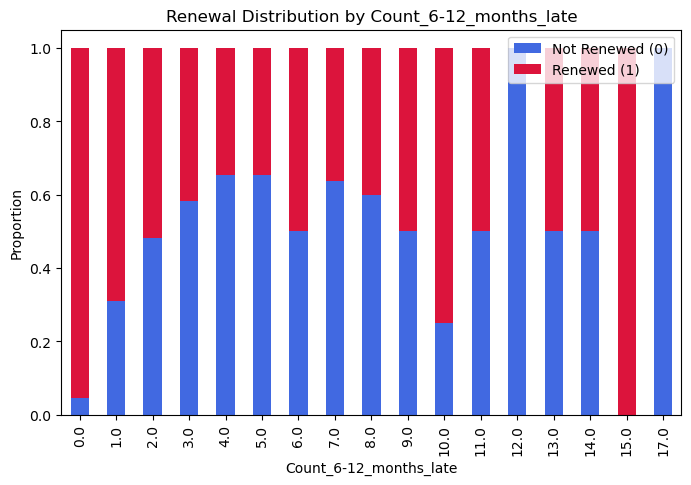


=== Crosstab for Count_6-12_months_late ===
renewal                     0      1
Count_6-12_months_late              
0.0                     0.045  0.955
1.0                     0.309  0.691
2.0                     0.482  0.518
3.0                     0.584  0.416
4.0                     0.654  0.346
5.0                     0.652  0.348
6.0                     0.500  0.500
7.0                     0.636  0.364
8.0                     0.600  0.400
9.0                     0.500  0.500
10.0                    0.250  0.750
11.0                    0.500  0.500
12.0                    1.000  0.000
13.0                    0.500  0.500
14.0                    0.500  0.500
15.0                    0.000  1.000
17.0                    1.000  0.000


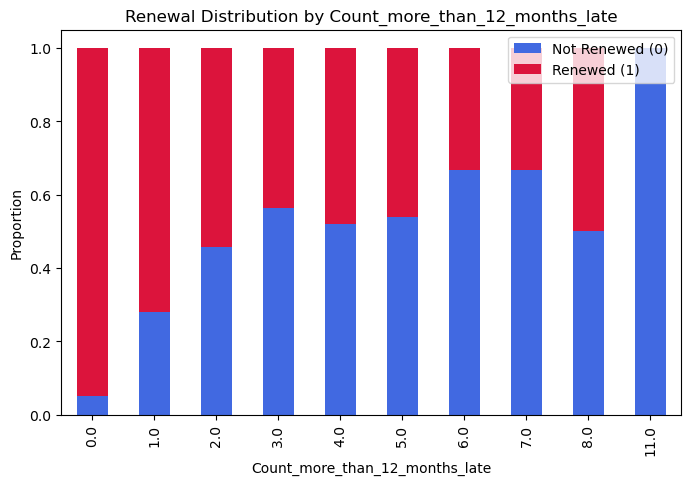


=== Crosstab for Count_more_than_12_months_late ===
renewal                             0      1
Count_more_than_12_months_late              
0.0                             0.049  0.951
1.0                             0.279  0.721
2.0                             0.458  0.542
3.0                             0.563  0.437
4.0                             0.521  0.479
5.0                             0.538  0.462
6.0                             0.667  0.333
7.0                             0.667  0.333
8.0                             0.500  0.500
11.0                            1.000  0.000


In [258]:
import matplotlib.pyplot as plt

late_features = [
    "Count_3-6_months_late",
    "Count_6-12_months_late",
    "Count_more_than_12_months_late"
]

for feat in late_features:
    # Crosstab for proportions
    ct = pd.crosstab(
        OG_proc[feat], 
        OG_proc['renewal'], 
        normalize='index'
    )

    # Plot
    ct.plot(
        kind="bar", stacked=True, 
        color=["royalblue", "crimson"], figsize=(8,5)
    )
    plt.title(f"Renewal Distribution by {feat}")
    plt.ylabel("Proportion")
    plt.xlabel(feat)
    plt.legend(["Not Renewed (0)", "Renewed (1)"])
    plt.show()

    # Print the table as well
    print(f"\n=== Crosstab for {feat} ===")
    print(ct.round(3))


In [261]:
# Count records for values > 10 in Count_6-12_months_late, grouped by renewal
above_10_counts = (
    OG_proc[OG_proc['Count_6-12_months_late'] > 0]
    .groupby(['Count_6-12_months_late', 'renewal'])
    .size()
    .unstack(fill_value=0)
)

above_10_counts

renewal,0,1
Count_6-12_months_late,,
1.0,828,1852
2.0,334,359
3.0,185,132
4.0,85,45
5.0,30,16
6.0,13,13
7.0,7,4
8.0,3,2
9.0,2,2


In [265]:
col = "premium"  # you can change this to any numeric column

# Recompute bounds for this column
Q1 = OG_proc[col].quantile(0.25)
Q3 = OG_proc[col].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Filter only outliers above UQR
outlier_counts = (
    OG_proc.loc[OG_proc[col] > upper, col]
    .value_counts()
    .sort_index()
)

print(f"Upper Bound = {upper:.2f}")
print("Outlier value counts above upper bound:")
print(outlier_counts)


Upper Bound = 26400.00
Outlier value counts above upper bound:
premium
28500    801
30600    474
32700    688
34800    392
36900    359
39000    259
41100    207
43200    158
45300    141
47400    134
49500    100
51600     81
53700     71
55800     52
57900    187
60000    419
Name: count, dtype: int64


### Premium Outlier Analysis

Using the IQR method, the **upper bound** for premiums was calculated as:

- **Upper Bound = 26,400**


- **Findings:**  
  - Premiums above 26,400 are flagged as outliers.  
  - A total of **4,523 records** fall into this category.  
  - Distinct premium values observed beyond the upper bound are structured and occur in multiples of 2,100.



- **Interpretation:**  
  - These values appear to be **systematic premium brackets**, not random errors.  
  - The structured increments suggest **genuine high-value policies** rather than noise.  
  - While they are statistical outliers, removing them might lead to loss of important information on high-paying customers.

- **Decision:**  
  Retain these records, but keep in mind their outlier nature when modeling.  
  Tree-based models (e.g., XGBoost, Random Forest) can naturally handle such skewed distributions, whereas normalization/standardization may be more appropriate for statistical models.


In [268]:
# Find violations where premiums paid > age
violations_df = OG_proc[
    OG_proc['no_of_premiums_paid'] > OG_proc['age_in_years']
][['age_in_years', 'no_of_premiums_paid', 'renewal']]

# Count how many
print(f"Total violations (premiums > age): {len(violations_df)}")

# Display the first few violating records
display(violations_df.head(20))


Total violations (premiums > age): 19


,age_in_years,no_of_premiums_paid,renewal
6084,33,37,1
7095,30,31,1
9608,36,50,0
15665,32,34,1
16203,33,38,0
19813,29,30,1
26644,53,60,1
41724,48,58,1
45055,45,47,0
46456,27,29,1


In [271]:
# Compute total late payments on the fly
total_lates = (
    OG_proc['Count_3-6_months_late'].fillna(0) +
    OG_proc['Count_6-12_months_late'].fillna(0) +
    OG_proc['Count_more_than_12_months_late'].fillna(0)
)

# Find violations
violations_lates = (total_lates > OG_proc['no_of_premiums_paid']).sum()
print(f"Records where total late payments > premiums paid: {violations_lates}")

# Get violating records (without adding total_lates column to OG_proc)
violating_records = OG_proc.loc[
    total_lates > OG_proc['no_of_premiums_paid'],
    ['Count_3-6_months_late','Count_6-12_months_late',
     'Count_more_than_12_months_late','no_of_premiums_paid','renewal']
]

violating_records


Records where total late payments > premiums paid: 242


,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,no_of_premiums_paid,renewal
7,1.0,6.0,4.0,3,0
40,0.0,10.0,0.0,8,0
566,0.0,3.0,1.0,3,0
647,0.0,4.0,0.0,2,1
930,0.0,2.0,1.0,2,0
...,...,...,...,...,...
77453,1.0,3.0,1.0,4,0
77758,1.0,5.0,2.0,5,0
77942,1.0,6.0,0.0,5,0
78500,1.0,2.0,0.0,2,1


### Handling Logical Inconsistencies in Late Payments

While exploring the dataset, we checked if the **total number of late payments** across all categories exceeded the **number of premiums paid**:

total_lates = Count_3_6_months_late + Count_6_12_months_late + Count_more_than_12_months_late

Violation if: total_lates > no_of_premiums_paid

---

**Findings:**  
- **242 records** (≈0.3% of the dataset) violated this condition.  
- Example: A customer with `no_of_premiums_paid = 2` but `total_lates = 6`.  
- These are **logically inconsistent**, since a customer cannot have more late payments than total premiums made.

---

**Options to Handle:**  
1. **Drop the violating records**  
   - Simple and clean, removes only a very small portion of data.  
2. **Cap total late counts** at the number of premiums paid  
   - Preserves all rows but may distort the real late distribution.  
3. **Investigate renewal outcomes** among these cases  
   - If most are non-renewals, they may still carry useful signal.

---

**Decision:**  
Since the violations are rare (**242 out of ~80k**), the preferred approach is to **drop these rows** for cleaner data integrity.


### Age Outlier Analysis

Using the IQR method, the **upper bound for age** was calculated as **93.5 years**.

- **Findings:**  
  - A total of **44 records** were flagged as outliers.  
  - Distinct values range from **94 to 103 years**.  
  - These are only slightly beyond the statistical cutoff and are realistic ages.

- **Interpretation:**  
  - The deviations are not extreme compared to the upper bound.  
  - Elderly customers (**94–103 years**) are plausible and valid records, not data entry errors.  
  - Removing them would unnecessarily reduce data diversity.

- **Decision:**  
  We will **keep these records**, as they represent genuine customers and do not distort the dataset.


In [280]:
# Pick the feature we are analyzing
col = "no_of_premiums_paid"

# Get its bounds
Q1 = OG_proc[col].quantile(0.25)
Q3 = OG_proc[col].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Filter only outlier rows
outlier_data = OG_proc.loc[OG_proc[col] > upper, [col, target_col]]

# Count target distribution for each distinct outlier value
outlier_summary = (
    outlier_data.groupby([col, target_col])
    .size()
    .unstack(fill_value=0)  # ensures both 0 and 1 appear
    .rename(columns={0: "Not Renewed", 1: "Renewed"})
)

print(f"Upper Bound = {upper:.2f}")
print("Outlier value counts by target:")
display(outlier_summary)


Upper Bound = 24.50
Outlier value counts by target:


renewal,Not Renewed,Renewed
no_of_premiums_paid,,
25,23,282
26,15,226
27,8,178
28,12,140
29,8,111
30,6,85
31,5,56
32,6,45
33,2,41


### Outliers in *Number of Premiums Paid*

- **Observation:**  
  - The upper bound for *no_of_premiums_paid* based on the IQR method was **24.5**.  
  - We identified **1426 records** above this threshold, with values ranging from **25 to 60**.  
  - Distribution of target labels shows that customers with higher premium counts are **predominantly renewed**.  

- **Example:**  
  - At `no_of_premiums_paid = 25`, ~92% customers renewed.  
  - Even at higher counts (e.g., 40+), most customers still renewed.  

- **Interpretation:**  
  - These values are **not data entry errors** but likely represent **long-term policyholders** who consistently renewed their plans.  
  - Hence, they are **business-relevant extreme values**, not anomalies to be removed.  

- **Decision:**  
  - **Keep these outliers as-is.**  
  - They carry **important predictive signal** about loyalty/renewal behavior.  
  - No imputation or capping applied.  


In [284]:
upper_bound = 468210
high_income = OG_proc[OG_proc['Income'] > upper_bound]
normal_income = OG_proc[OG_proc['Income'] <= upper_bound]

print("Renewal rate (high income):", high_income['renewal'].mean())
print("Renewal rate (normal income):", normal_income['renewal'].mean())


Renewal rate (high income): 0.9521586931155193
Renewal rate (normal income): 0.9367484461890743


In [405]:
# Compute IQR bounds for Income
Q1 = OG_proc['Income'].quantile(0.25)
Q3 = OG_proc['Income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print("Upper Bound for Income (IQR method):", upper_bound)

# Subset of records above upper bound
income_outliers = OG_proc[OG_proc['Income'] > upper_bound]

# Total count
print("Number of records above upper bound:", income_outliers.shape[0])

# Breakdown by target
print("\nBreakdown by renewal:")
print(income_outliers['renewal'].value_counts())


Upper Bound for Income (IQR method): 468210.0
Number of records above upper bound: 3428

Breakdown by renewal:
renewal
1    3264
0     164
Name: count, dtype: int64


In [409]:
# Max income where renewal == 0
max_income_nonrenew = OG_proc.loc[OG_proc['renewal'] == 0, 'Income'].max()
print("Max Income (renewal = 0):", max_income_nonrenew)

# Number of records with income greater than that
count_higher = (OG_proc['Income'] > max_income_nonrenew).sum()
print("Number of records with Income > that value:", count_higher)


Max Income (renewal = 0): 7500070
Number of records with Income > that value: 16


### Conclusion on Income Outliers

- Using the IQR method, the **upper bound for income** was identified as **468,210**.  
- **3,428 records (~4.3% of the dataset)** fall above this bound.  
- Among these high-income customers:  
  - **Renewal rate = 95.2%** (vs. 93.7% for normal income customers).  
  - Only **164 customers (≈4.8%) did not renew**.  
- The **maximum income among non-renewed customers** is **7,500,070**, and there are **only 16 customers** with income greater than this.  

**Interpretation:**  
- High-income outliers are not random noise but represent a valid customer segment.  
- They exhibit **higher renewal rates than the normal-income group**, indicating strong loyalty among high-income customers.  
- Removing or imputing these values would risk discarding meaningful predictive information.  

**Decision:**  
 We will **retain income outliers without imputation**, as they carry valuable signal for predicting renewals.  


### Decision on Outlier Handling

During data exploration, we identified several features (e.g., **Income, Premium, No. of Premiums Paid, Age**) with statistical outliers based on the IQR rule.  

- However, further analysis showed that:
  - Many of these outliers correspond to **valid business cases** (e.g., customers with very high income or long premium histories).  
  - Outliers are not simply noise — they carry **useful information** about extreme but real customer behaviors.  
  - Renewal rates among outliers are often **similar or higher** compared to non-outliers (e.g., high-income customers renew more often).  

For this reason, we **decided not to impute or remove outliers**.  
Instead, we will keep them as-is to preserve potential signal.

---

**Modeling Direction:**  

- Since outliers distort linear models and distance-based models (Logistic Regression, KNN, SVM), we will prefer **tree-based ensembles** that are robust to extreme values.


In [293]:
# Identify categorical columns
cat_cols = OG_proc.select_dtypes(include=['object']).columns.tolist()

# Separate binary vs multi-categorical
binary_cats = [c for c in cat_cols if OG_proc[c].nunique() == 2]
multi_cats  = [c for c in cat_cols if OG_proc[c].nunique() > 2]


In [295]:

print("Categorical:", cat_cols)
print("Binary categorical:", binary_cats)
print("Multi categorical:", multi_cats)

Categorical: ['sourcing_channel', 'residence_area_type']
Binary categorical: ['residence_area_type']
Multi categorical: ['sourcing_channel']


In [297]:
# Apply one-hot encoding differently
OG_proc_encoded = pd.get_dummies(
    OG_proc,
    columns=binary_cats,
    drop_first=True  # safe for binary
)

OG_proc_encoded = pd.get_dummies(
    OG_proc_encoded,
    columns=multi_cats,
    drop_first=False  # keep all categories for multi-categorical
)

In [299]:
print("Shape before encoding:", OG_proc.shape)
print("Shape after encoding :", OG_proc_encoded.shape)

Shape before encoding: (79853, 12)
Shape after encoding : (79853, 16)


In [301]:
OG_proc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   Income                            79853 non-null  int64  
 2   Count_3-6_months_late             79756 non-null  float64
 3   Count_6-12_months_late            79756 non-null  float64
 4   Count_more_than_12_months_late    79756 non-null  float64
 5   application_underwriting_score    76879 non-null  float64
 6   no_of_premiums_paid               79853 non-null  int64  
 7   premium                           79853 non-null  int64  
 8   renewal                           79853 non-null  int64  
 9   age_in_years                      79853 non-null  int64  
 10  residence_area_type_Urban         79853 non-null  bool   
 11  sourcing_channel_A                79853 non-null  bool   
 12  sour

In [303]:
OG_proc_encoded.describe(include='all')

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,age_in_years,residence_area_type_Urban,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E
count,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853,79853,79853,79853,79853,79853
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48183,43134,63341,67814,72294,79244
mean,0.314288,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410,51.607404,NaN,NaN,NaN,NaN,NaN,NaN
std,0.334915,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226,14.270484,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.034000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.167000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.538000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000,62.000000,NaN,NaN,NaN,NaN,NaN,NaN


###  Observation about missing late payment counts  

Interestingly, whenever we encounter missing values in the late payment fields  
(`Count_3-6_months_late`, `Count_6-12_months_late`, and `Count_more_than_12_months_late`),  
all three of them are missing together for the same customer records.  

This suggests that the missingness is not random but systematic. One possible explanation is that for these customers, there were simply no late payments at all, and the system chose to leave all late payment fields blank instead of recording zeros.  

This makes the assumption of imputing missing values with zero even more plausible,  
because the absence of data across all three late payment columns may effectively indicate  
“no late payments recorded.”  

At the same time, this pattern is worth validating further, since systematic missingness  
could reflect a data-entry convention rather than random data loss.  


###  Why imputing late payment counts with zero is reasonable  

The late payment fields (`Count_3-6_months_late`, `Count_6-12_months_late`,  
`Count_more_than_12_months_late`) are dominated by zeros — the majority of customers have no late payments.  

Because of this, even if we impute missing values using **mean**, **median**, or **mode**,  
the result would still effectively be zero.  

This reinforces the assumption that filling missing values with `0` is consistent with  
the underlying data distribution and does not distort the dataset.  


In [307]:
# List of late payment columns
late_payment_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]

# Impute missing values with zero
OG_proc_encoded[late_payment_cols] = OG_proc_encoded[late_payment_cols].fillna(0)

# Quick check
print(OG_proc_encoded[late_payment_cols].isnull().sum())


Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
dtype: int64


###  Handling missing values in `application_underwriting_score`  

The column `application_underwriting_score` has a noticeable number of missing values.  
Unlike the late payment counts, where missing values are clearly dominated by zeros,  
this feature is a continuous score and may be influenced by other attributes such as  
income, premium amount, age, or number of premiums paid.  

If we were to impute it with a simple **mean**, **median**, or **mode**,  
we would lose the variation and introduce bias by assigning the same value across all missing entries.  

To better preserve relationships in the data, a more suitable approach is to use  
**KNN imputation**. This method estimates missing values by looking at the most  
similar records (nearest neighbors) and imputing based on their values.  
This way, the imputed score is more context-aware and consistent with the profile  
of the customer.  


In [310]:
# Select numeric columns (to help KNN find neighbors)
num_cols = OG_proc_encoded.select_dtypes(include=['int64','float64']).columns.tolist()

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN to the entire encoded dataset
OG_proc_encoded_imputed = pd.DataFrame(
    knn_imputer.fit_transform(OG_proc_encoded),
    columns=OG_proc_encoded.columns,
    index=OG_proc_encoded.index
)

# Replace back into OG_proc_encoded (only underwriting score, but now everything imputed)
OG_proc_encoded['application_underwriting_score'] = OG_proc_encoded_imputed['application_underwriting_score']


# Check missing count
print("Missing in application_underwriting_score after KNN:",
      OG_proc_encoded['application_underwriting_score'].isnull().sum())

Missing in application_underwriting_score after KNN: 0


In [311]:
# Step 1: Copy OG_proc
OG_proc_imputed = OG_proc.copy()

# Step 2: Impute missing values from OG_proc_encoded_imputed
cols_to_impute = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late',
    'application_underwriting_score'
]

for col in cols_to_impute:
    OG_proc_imputed[col] = OG_proc_encoded_imputed[col]

# Step 3: Check missing values (should be 0 now)
print("Missing values after imputation:\n", OG_proc_imputed[cols_to_impute].isnull().sum())


Missing values after imputation:
 Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
application_underwriting_score    0
dtype: int64


In [312]:
OG_proc_imputed.isna().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
age_in_years                        0
dtype: int64

###  Separate datasets for different model families  

Since tree-based models (e.g., Decision Tree, Random Forest, XGBoost) do not require  
normalization or standardization, we will keep one dataset in its **raw numeric form**  
(after imputations and one-hot encoding).  

However, for models that are sensitive to feature scale (e.g., Logistic Regression,  
KNN, SVM, Neural Networks), we will maintain a **separately standardized dataset**.  

- **`OG_proc_encoded`** → for tree-based models (no scaling).  
- **`OG_proc_scaled`** → for statistical / distance-based models (after standardization).  

This ensures that each model type gets the input in the most suitable form  
without mixing preprocessing requirements.


In [316]:
# Tree dataset
OG_proc_tree = OG_proc_encoded_imputed.copy()

In [318]:
# Statistical dataset (standardization)
OG_proc_stat = OG_proc_encoded_imputed.copy()
scaler_stat = StandardScaler()
num_cols_stat = OG_proc_stat.select_dtypes(include=['int64','float64']).columns.drop('renewal')
OG_proc_stat[num_cols_stat] = scaler_stat.fit_transform(OG_proc_stat[num_cols_stat])


In [320]:
# Normalized dataset
OG_proc_norm = OG_proc_encoded_imputed.copy()
scaler_norm = MinMaxScaler()
num_cols_norm = OG_proc_norm.select_dtypes(include=['int64','float64']).columns.drop('renewal')
OG_proc_norm[num_cols_norm] = scaler_norm.fit_transform(OG_proc_norm[num_cols_norm])

### Handling Imbalanced Target (Renewal vs Non-Renewal)

In our dataset, around 93% of customers renew, while only 7% do not renew.  
If we train on this data directly, models will become biased towards predicting renewals, missing the critical minority class of non-renewals.

To address this, we applied different strategies:
- **Tree-based models (XGBoost, Random Forest):** retain the imbalanced dataset and adjust `scale_pos_weight` to emphasize the minority class.
- **Statistical and neural models (Logistic Regression, SVM, KNN):** create balanced training sets using oversampling (SMOTE/ADASYN) so that non-renewals are equally represented.
- **Evaluation metrics:** we will rely on balanced accuracy, F1-scores per class, and PR-AUC, to ensure the model performs well for both renewals and non-renewals.

This approach helps avoid missing non-renewals while still retaining high accuracy on renewals.


In [330]:
smote = SMOTE(random_state=42)

In [332]:
# For standardized dataset
OG_proc_stat_balanced, y_stat_bal = smote.fit_resample(
    OG_proc_stat.drop(columns=[target_col]),
    OG_proc_stat[target_col]
)

In [334]:
# Recombine into DataFrame
OG_proc_stat_balanced = pd.DataFrame(OG_proc_stat_balanced, columns=OG_proc_stat.drop(columns=[target_col]).columns)
OG_proc_stat_balanced[target_col] = y_stat_bal

In [337]:
# For normalized dataset
OG_proc_norm_balanced, y_norm_bal = smote.fit_resample(
    OG_proc_norm.drop(columns=[target_col]),
    OG_proc_norm[target_col]
)
# Recombine into DataFrame
OG_proc_norm_balanced = pd.DataFrame(OG_proc_norm_balanced, columns=OG_proc_norm.drop(columns=[target_col]).columns)
OG_proc_norm_balanced[target_col] = y_norm_bal


In [339]:

# 3) Encoded + Imputed dataset

X_enc = OG_proc_encoded_imputed.drop(columns=[target_col])
y_enc = OG_proc_encoded_imputed[target_col]

X_enc_bal, y_enc_bal = smote.fit_resample(X_enc, y_enc)
OG_proc_encoded_imputed_balanced = pd.DataFrame(X_enc_bal, columns=X_enc.columns)
OG_proc_encoded_imputed_balanced[target_col] = y_enc_bal


In [341]:
OG_proc_imputed.isna().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
age_in_years                        0
dtype: int64

In [343]:

ros = RandomOverSampler(random_state=42)
X_proc = OG_proc_imputed.drop(columns=[target_col])
y_proc = OG_proc_imputed[target_col]

X_proc_bal, y_proc_bal = ros.fit_resample(X_proc, y_proc)

OG_proc_imputed_balanced = pd.DataFrame(X_proc_bal, columns=X_proc.columns)
OG_proc_imputed_balanced[target_col] = y_proc_bal


In [346]:
print("Balanced stat dataset shape:", OG_proc_stat_balanced.shape)
print("Balanced norm dataset shape:", OG_proc_norm_balanced.shape)
print("Balanced encoded_imputed dataset shape:", OG_proc_encoded_imputed_balanced.shape)
print("Balanced OG_proc shape:", OG_proc_imputed_balanced.shape)

print("\nClass distribution (stat):\n", OG_proc_stat_balanced[target_col].value_counts())
print("\nClass distribution (norm):\n", OG_proc_norm_balanced[target_col].value_counts())
print("\nClass distribution (encoded_imputed):\n", OG_proc_encoded_imputed_balanced[target_col].value_counts())
print("\nClass distribution (balanced):\n", OG_proc_imputed_balanced[target_col].value_counts())

Balanced stat dataset shape: (149710, 16)
Balanced norm dataset shape: (149710, 16)
Balanced encoded_imputed dataset shape: (149710, 16)
Balanced OG_proc shape: (149710, 12)

Class distribution (stat):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (norm):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (encoded_imputed):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (balanced):
 renewal
1    74855
0    74855
Name: count, dtype: int64


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_87921/4227589052.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature',


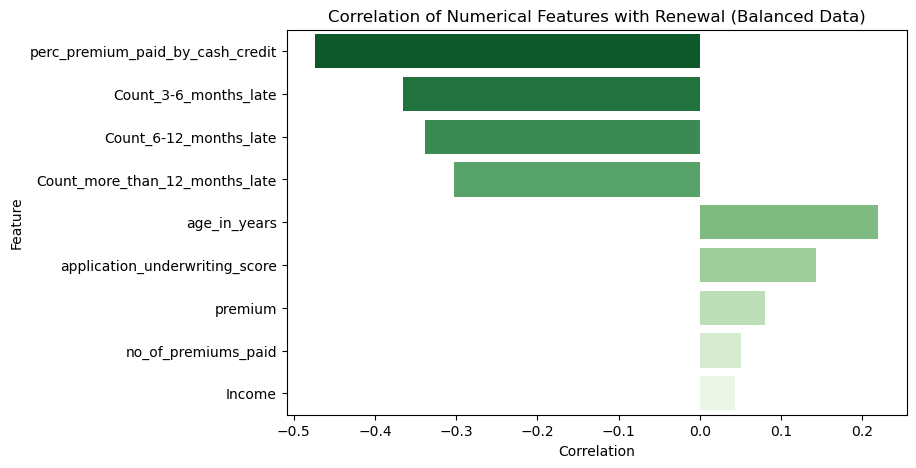

In [352]:
# ----------------------------
# 1) Numerical (Continuous) vs Target (Balanced)
# ----------------------------
results_num_bal = []
for col in num_cols:
    if col != target_col:
        corr, p = pointbiserialr(
            OG_proc_encoded_imputed_balanced[col],
            OG_proc_encoded_imputed_balanced[target_col]
        )
        results_num_bal.append([col, corr, p])

num_corr_bal_df = pd.DataFrame(results_num_bal, columns=['Feature','Correlation','p-value'])

plt.figure(figsize=(8,5))
sns.barplot(x='Correlation', y='Feature',
            data=num_corr_bal_df.sort_values(by='Correlation', key=abs, ascending=False),
            palette="Greens_r")
plt.title("Correlation of Numerical Features with Renewal (Balanced Data)")
plt.show()


In [354]:
OG_proc_imputed_balanced.describe()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,age_in_years,renewal
count,149710.000000,1.497100e+05,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000
mean,0.460482,1.944048e+05,0.553597,0.301763,0.193153,98.976277,10.651186,10312.068666,49.173649,0.500000
std,0.376975,3.897055e+05,1.097750,0.879262,0.590622,0.802025,5.488891,9077.758929,13.855414,0.500002
min,0.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,21.000000,0.000000
25%,0.074000,9.907000e+04,0.000000,0.000000,0.000000,98.690000,7.000000,5400.000000,39.000000,0.000000
50%,0.403000,1.523800e+05,0.000000,0.000000,0.000000,99.140000,10.000000,7500.000000,48.000000,0.500000
75%,0.861000,2.359000e+05,1.000000,0.000000,0.000000,99.500000,14.000000,13800.000000,59.000000,1.000000
max,1.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,103.000000,1.000000


In [356]:
cat_cols

['sourcing_channel', 'residence_area_type']

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_87921/1975972667.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CramersV', y='Feature',


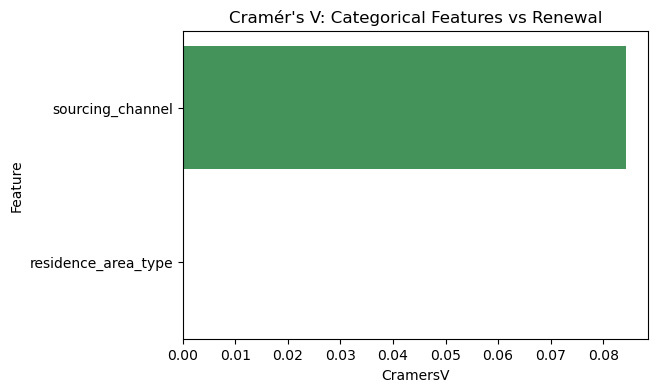

In [358]:
# ----------------------------
# 2) Categorical vs Target
# ----------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

results_cat = []
for col in cat_cols:
    cv = cramers_v(OG_proc_imputed_balanced[col], OG_proc_imputed_balanced[target_col])
    results_cat.append([col, cv])

cat_corr_df = pd.DataFrame(results_cat, columns=['Feature','CramersV'])

plt.figure(figsize=(6,4))
sns.barplot(x='CramersV', y='Feature',
            data=cat_corr_df.sort_values(by='CramersV', ascending=False),
            palette="Greens_r")
plt.title("Cramér's V: Categorical Features vs Renewal")
plt.show()

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_87921/1853467726.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI_Score", y="Feature", data=mi_df_bal, palette="viridis")


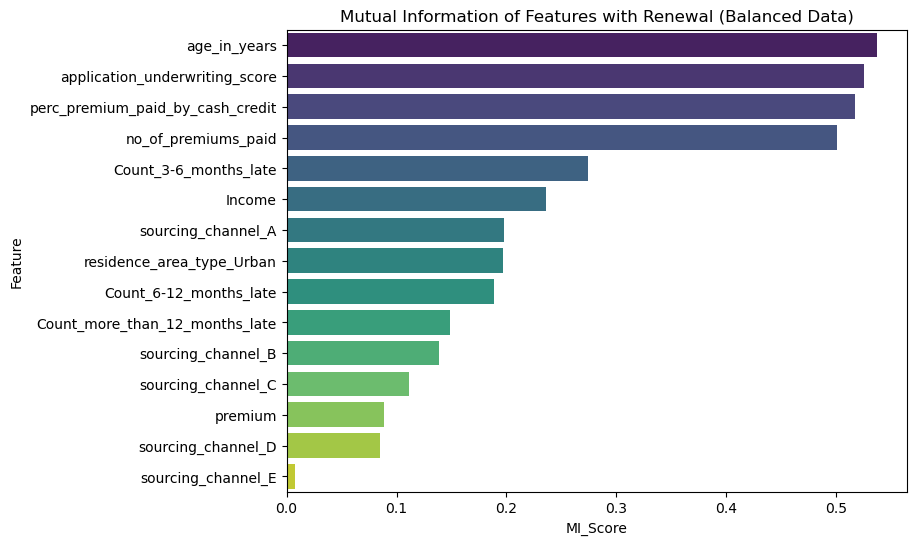

                      Feature  MI_Score
10         sourcing_channel_A  0.198054
9   residence_area_type_Urban  0.196515
11         sourcing_channel_B  0.138849
12         sourcing_channel_C  0.111666
13         sourcing_channel_D  0.084748
14         sourcing_channel_E  0.007957


In [361]:
from sklearn.feature_selection import mutual_info_classif

# Prepare data (use balanced + imputed + encoded dataset)
X_bal = OG_proc_encoded_imputed_balanced.drop(columns=[target_col])
y_bal = OG_proc_encoded_imputed_balanced[target_col]

# Compute Mutual Information for all features
mi_scores_bal = mutual_info_classif(X_bal, y_bal, discrete_features='auto', random_state=42)

# Put into DataFrame for easy view
mi_df_bal = pd.DataFrame({
    "Feature": X_bal.columns,
    "MI_Score": mi_scores_bal
}).sort_values(by="MI_Score", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="MI_Score", y="Feature", data=mi_df_bal, palette="viridis")
plt.title("Mutual Information of Features with Renewal (Balanced Data)")
plt.show()

# Focus on sourcing_channel & residence_area_type
print(mi_df_bal[mi_df_bal['Feature'].str.contains("sourcing_channel|residence_area_type")])


### Feature Importance Insights

- No single feature shows strong predictive power for renewal when analyzed individually.  
- Late payment history and premium-related variables provide the highest signal, but even their effect sizes are small.  
- Mutual Information and correlation analysis confirm that most features carry only weak standalone associations with renewal.  
- However, when combined in multivariate models, these weak signals accumulate and allow tree-based methods (e.g., XGBoost) to achieve strong predictive performance (AUC ~0.85).  

**Takeaway:** The dataset does not have a "silver bullet" predictor. Predictive power comes from combining many weak features rather than relying on one dominant driver.


In [363]:
anchor = 'residence_area_type'   # fixed first index
target = 'renewal'
n_bins = 4                       # quartiles for numeric features

# features to pair with the anchor (exclude anchor + target)
all_feats = [c for c in OG_proc_imputed_balanced.columns if c not in [anchor, target]]

def bin_numeric(series, q=n_bins):
    """Bin numeric series with qcut; fallback to equal-width if needed."""
    try:
        return pd.qcut(series, q=q, duplicates='drop')
    except Exception:
        # fallback when too many ties or low unique values
        return pd.cut(series, bins=q)

crosstabs = {}  # store results if you want to reuse

for feat in all_feats:
    s_anchor = OG_proc_imputed_balanced[anchor]
    s_feat = OG_proc_imputed_balanced[feat]

    if pd.api.types.is_numeric_dtype(s_feat):
        idx2 = bin_numeric(s_feat, q=n_bins)
        title = f"{anchor} × {feat} (binned)"
        idx = [s_anchor, idx2]
    else:
        title = f"{anchor} × {feat}"
        idx = [s_anchor, s_feat]

    # Crosstab: row-wise proportions of renewal 0/1
    ct = pd.crosstab(idx, OG_proc_imputed_balanced[target], normalize='index')

    # Optional: nicer column names 0/1 → ['0','1']
    ct.columns = [0, 1]

    crosstabs[feat] = ct

    print(f"\n=== {title} ===")
    display(ct)   # in notebooks this renders like your example



=== residence_area_type × perc_premium_paid_by_cash_credit (binned) ===


0         1
residence_area_type perc_premium_paid_by_cash_credit                    
Rural               (-0.001, 0.074]                   0.242573  0.757427
                    (0.074, 0.403]                    0.355243  0.644757
                    (0.403, 0.861]                    0.621844  0.378156
                    (0.861, 1.0]                      0.785536  0.214464
Urban               (-0.001, 0.074]                   0.231246  0.768754
                    (0.074, 0.403]                    0.354597  0.645403
                    (0.403, 0.861]                    0.628965  0.371035
                    (0.861, 1.0]                      0.782568  0.217432


=== residence_area_type × Income (binned) ===


0         1
residence_area_type Income                                    
Rural               (24029.999, 99070.0]    0.597427  0.402573
                    (99070.0, 152380.0]     0.537583  0.462417
                    (152380.0, 235900.0]    0.470068  0.529932
                    (235900.0, 90262600.0]  0.395301  0.604699
Urban               (24029.999, 99070.0]    0.591792  0.408208
                    (99070.0, 152380.0]     0.521549  0.478451
                    (152380.0, 235900.0]    0.473875  0.526125
                    (235900.0, 90262600.0]  0.411829  0.588171


=== residence_area_type × Count_3-6_months_late (binned) ===


0         1
residence_area_type Count_3-6_months_late                    
Rural               (-0.001, 1.0]          0.447131  0.552869
                    (1.0, 13.0]            0.851248  0.148752
Urban               (-0.001, 1.0]          0.444079  0.555921
                    (1.0, 13.0]            0.853062  0.146938


=== residence_area_type × Count_6-12_months_late (binned) ===


,,0,1
residence_area_type,Count_6-12_months_late,,
Rural,"(-0.001, 17.0]",0.501286,0.498714
Urban,"(-0.001, 17.0]",0.499152,0.500848



=== residence_area_type × Count_more_than_12_months_late (binned) ===


,,0,1
residence_area_type,Count_more_than_12_months_late,,
Rural,"(-0.001, 11.0]",0.501286,0.498714
Urban,"(-0.001, 11.0]",0.499152,0.500848



=== residence_area_type × application_underwriting_score (binned) ===


0         1
residence_area_type application_underwriting_score                    
Rural               (91.899, 98.69]                 0.622738  0.377262
                    (98.69, 99.14]                  0.480551  0.519449
                    (99.14, 99.5]                   0.441577  0.558423
                    (99.5, 99.89]                   0.457338  0.542662
Urban               (91.899, 98.69]                 0.617020  0.382980
                    (98.69, 99.14]                  0.496084  0.503916
                    (99.14, 99.5]                   0.428470  0.571530
                    (99.5, 99.89]                   0.454212  0.545788


=== residence_area_type × no_of_premiums_paid (binned) ===


0         1
residence_area_type no_of_premiums_paid                    
Rural               (1.999, 7.0]         0.577634  0.422366
                    (7.0, 10.0]          0.429985  0.570015
                    (10.0, 14.0]         0.470093  0.529907
                    (14.0, 60.0]         0.503919  0.496081
Urban               (1.999, 7.0]         0.556865  0.443135
                    (7.0, 10.0]          0.444813  0.555187
                    (10.0, 14.0]         0.465699  0.534301
                    (14.0, 60.0]         0.516523  0.483477


=== residence_area_type × sourcing_channel ===


0         1
residence_area_type sourcing_channel                    
Rural               A                 0.466105  0.533895
                    B                 0.513403  0.486597
                    C                 0.542441  0.457559
                    D                 0.579302  0.420698
                    E                 0.511673  0.488327
Urban               A                 0.460627  0.539373
                    B                 0.508347  0.491653
                    C                 0.549970  0.450030
                    D                 0.579016  0.420984
                    E                 0.548480  0.451520


=== residence_area_type × premium (binned) ===


0         1
residence_area_type premium                               
Rural               (1199.999, 5400.0]  0.542856  0.457144
                    (5400.0, 7500.0]    0.534014  0.465986
                    (7500.0, 13800.0]   0.466836  0.533164
                    (13800.0, 60000.0]  0.419987  0.580013
Urban               (1199.999, 5400.0]  0.544788  0.455212
                    (5400.0, 7500.0]    0.529684  0.470316
                    (7500.0, 13800.0]   0.473330  0.526670
                    (13800.0, 60000.0]  0.425391  0.574609


=== residence_area_type × age_in_years (binned) ===


0         1
residence_area_type age_in_years                      
Rural               (20.999, 39.0]  0.611445  0.388555
                    (39.0, 48.0]    0.545271  0.454729
                    (48.0, 59.0]    0.502216  0.497784
                    (59.0, 103.0]   0.323069  0.676931
Urban               (20.999, 39.0]  0.592557  0.407443
                    (39.0, 48.0]    0.557080  0.442920
                    (48.0, 59.0]    0.496389  0.503611
                    (59.0, 103.0]   0.338417  0.661583

### Interaction Analysis: Residence Area Type (Urban vs Rural)

Exploratory checks show that `residence_area_type` on its own has almost no influence on renewal outcomes.  
Renewal rates for Urban and Rural customers are nearly identical, making the variable look more like random noise than a meaningful predictor.  

To ensure we were not missing hidden patterns, we extended the analysis to see if `residence_area_type` interacts with other features such as premium, age, income, late payment counts, or sourcing channel.  
Even in this multivariate setting, the observed differences were negligible — with the largest gap being around 2.7% for late payment history, and most others well below 1%.  

**Summary:** `residence_area_type` does not appear to be an impactful driver of renewal, either directly or through interactions.  
- For **tree-based models** (XGBoost, Random Forest, Gradient Boosting), it can be **kept** since these algorithms can automatically handle weak or redundant features.  
- For **statistical models** (Logistic Regression or other linear approaches), it can be **safely removed** to reduce noise and simplify the model.


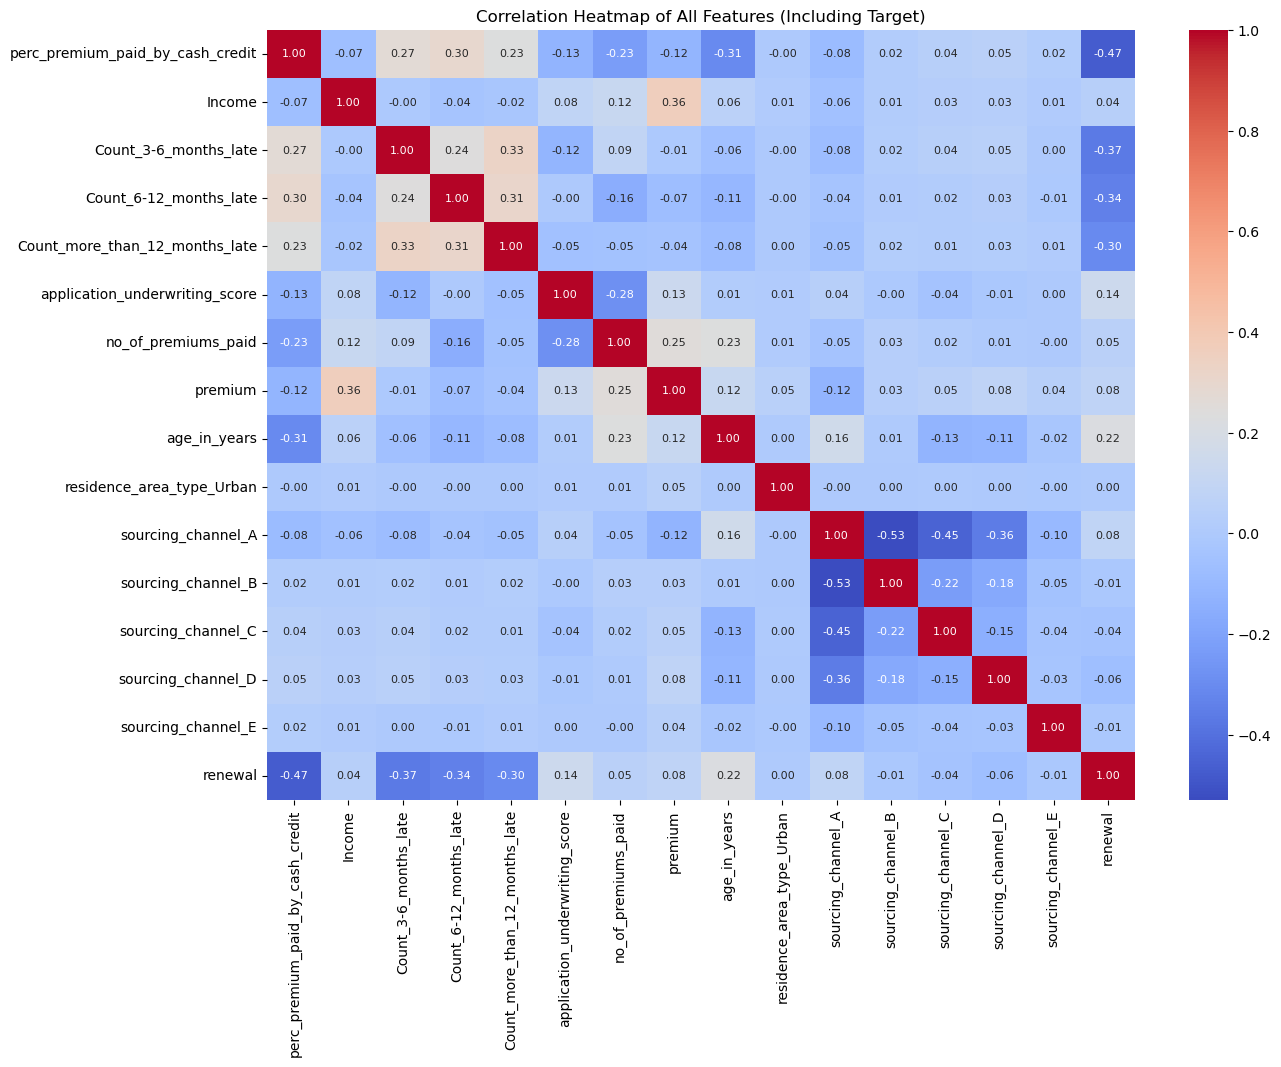

In [369]:
# Compute correlation matrix
corr_matrix = OG_proc_encoded_imputed_balanced.corr()

# Plot heatmap with correlation values
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,        # ✅ this adds correlation values
    fmt=".2f",         # format to 2 decimal places
    cbar=True,
    annot_kws={"size":8}  # smaller text size so it fits
)
plt.title("Correlation Heatmap of All Features (Including Target)")
plt.show()

In [372]:
OG_proc_stat_balanced.describe()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,age_in_years,residence_area_type_Urban,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,renewal
count,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000
mean,0.446558,-0.035528,0.418344,0.494737,0.419503,-0.109002,-0.054419,-0.082148,-0.179646,-0.002547,-0.063164,0.006546,0.036869,0.050717,0.009078,0.500000
std,1.109522,0.770439,1.511706,1.949845,1.837418,1.046283,1.019562,0.923750,0.942356,0.991408,1.001611,1.003089,1.033730,1.065875,1.050087,0.500002
min,-0.938418,-0.372180,-0.359383,-0.179012,-0.192199,-9.790718,-1.714268,-1.034344,-2.144818,-1.233454,-1.083838,-0.510572,-0.421343,-0.323356,-0.087665,0.000000
25%,-0.681634,-0.214884,-0.359383,-0.179012,-0.192199,-0.478550,-0.747272,-0.587612,-0.883466,-1.233454,-1.083838,-0.510572,-0.421343,-0.323356,-0.087665,0.000000
50%,0.291755,-0.114399,-0.359383,-0.179012,-0.192199,0.100288,-0.167075,-0.364247,-0.252776,0.810732,0.922647,-0.510572,-0.421343,-0.323356,-0.087665,0.500000
75%,1.608517,0.040291,1.087590,-0.179012,-0.192199,0.564783,0.492078,0.198724,0.447962,0.810732,0.922647,-0.510572,-0.421343,-0.323356,-0.087665,1.000000
max,2.047437,181.348112,18.451265,38.789649,35.082504,1.124909,9.502880,5.219899,3.601344,0.810732,0.922647,1.958586,2.373365,3.092566,11.407082,1.000000


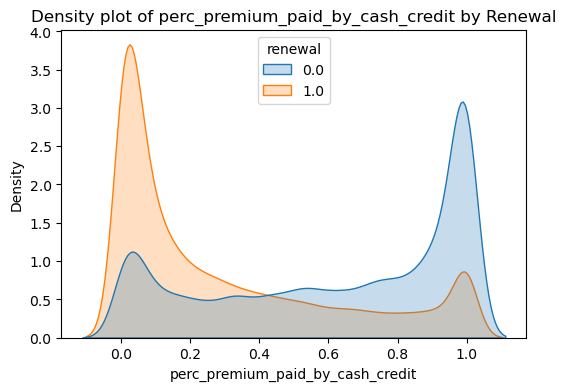

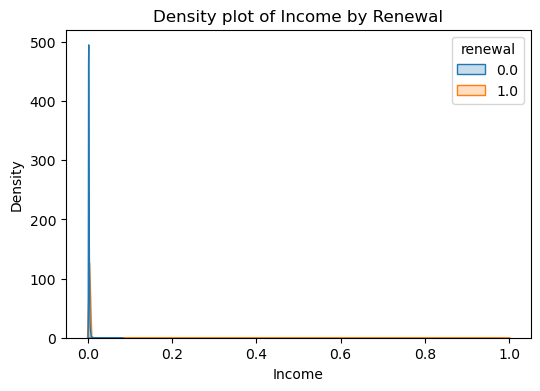

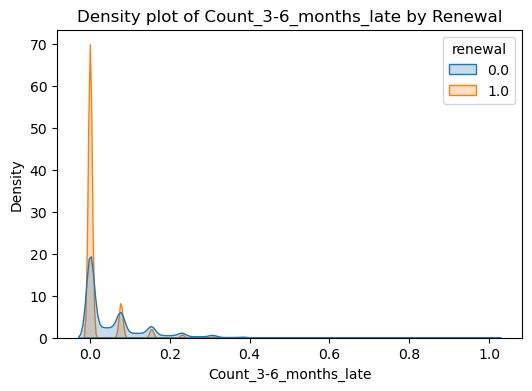

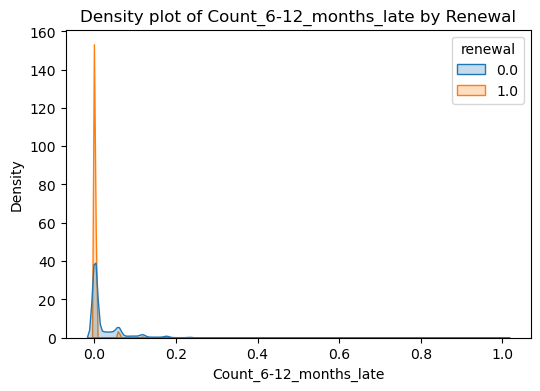

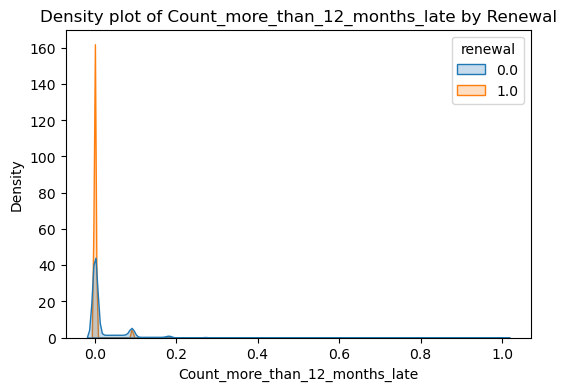

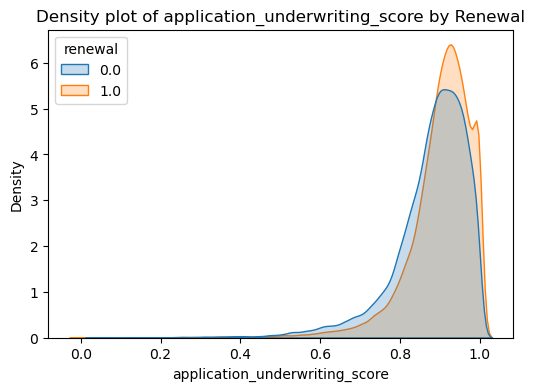

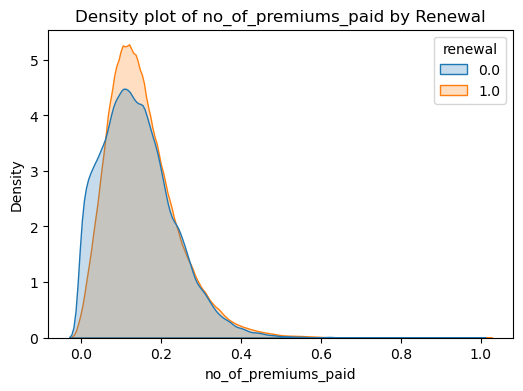

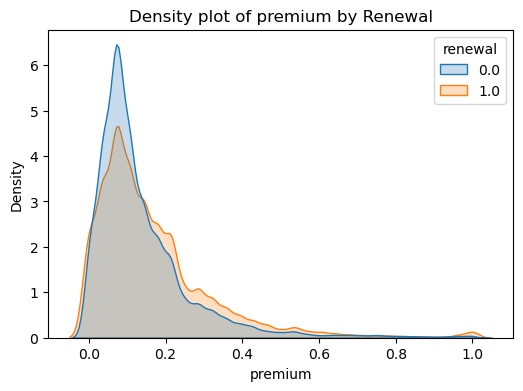

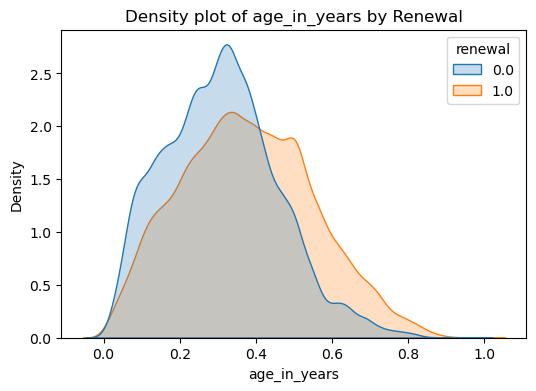

In [395]:
# Example density plot loop (standardized balanced dataset)
for col in num_cols:   # reuse your extracted continuous cols
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.kdeplot(data=OG_proc_norm_balanced, x=col, hue=target_col, fill=True, common_norm=False)
        plt.title(f"Density plot of {col} by Renewal")
        plt.show()


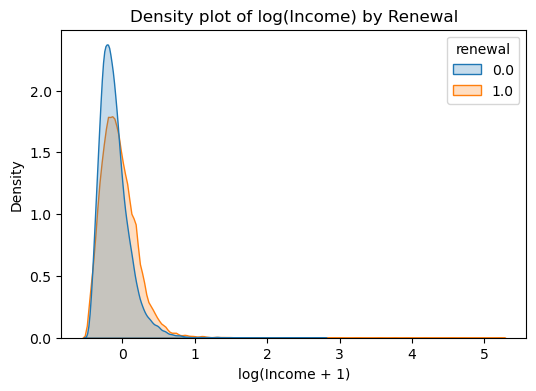

In [389]:
# Log-transform just for visualization
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=np.log1p(OG_proc_stat_balanced['Income']),   # log-transform only here
    hue=OG_proc_stat_balanced[target_col],
    fill=True, 
    common_norm=False
)
plt.title("Density plot of log(Income) by Renewal")
plt.xlabel("log(Income + 1)")
plt.show()


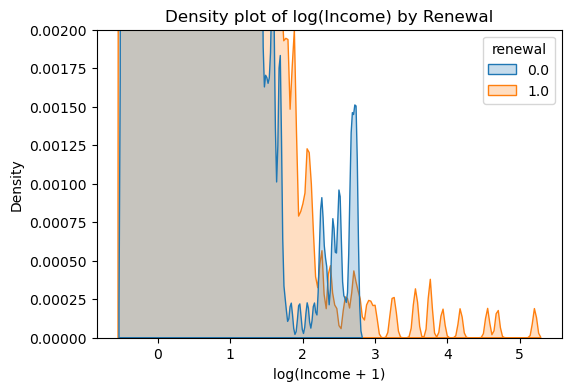

In [393]:
# Log-transform just for visualization (with capped y-axis)
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=np.log1p(OG_proc_stat_balanced['Income']),   # log-transform only here
    hue=OG_proc_stat_balanced[target_col],
    fill=True, 
    common_norm=False
)
plt.title("Density plot of log(Income) by Renewal")
plt.xlabel("log(Income + 1)")
plt.ylim(0, 0.002)   # cap density axis
plt.show()


### Feature Distributions by Renewal Status

We plotted the density distributions of key numerical features (premium, income, underwriting score, late payment counts, etc.) across renewal status (0 = Not Renewed, 1 = Renewed).

**Observations:**

- Most features show **heavy overlap** between renewed and not-renewed customers.  
- Examples:
  - **Income**: Very similar distributions for both groups, with only slight differences in higher ranges.  
  - **Premium** and **No. of Premiums Paid**: Almost identical densities with minor shifts.  
  - **Late Payment Counts**: Some differences at higher values, but still considerable overlap.  
  - **Application Underwriting Score**: Shows clearer separation (renewed customers tend to have higher scores).  

**Implications:**

- No single feature can act as a strong discriminator.  
- Renewal behavior is driven by **interactions across multiple variables** rather than individual ones.  
- Linear models (e.g., Logistic Regression) may struggle to capture this overlap effectively.  

**Modeling Direction:**

- Use **tree-based ensemble methods** (e.g., Random Forest, XGBoost, CatBoost) which:
  - Can capture **non-linear relationships**.  
  - Naturally handle **outliers and skewed distributions**.  
  - Exploit **feature interactions** to improve predictive power.  
- Consider **ensembling approaches** (bagging/boosting) for more robust performance compared to single models.  

**Conclusion:**  
Due to strong feature overlap, we will rely on **ensemble models** that can combine multiple weak signals into stronger predictions rather than depending on individual features.


### Final Model Decision
- Both **outlier analysis** and **EDA** point towards ensemble tree-based methods as the most appropriate.  
- Candidate models:  
  - **Random Forest (Bagging)** – stable and interpretable feature importance.  
  - **Boosting methods (XGBoost / LightGBM / CatBoost)** – strong accuracy and ability to capture subtle interactions.   

We will proceed with **ensemble tree-based models** as the primary modeling approach.


In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(renewal_rate, annot=True, fmt=".2f", cmap="Blues")
plt.title("Renewal % by Age Group and Premium Slab")
plt.show()

NameError: name 'renewal_rate' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
OG_clean = OG.drop(columns=['id'])

In [ ]:
OG_clean.head()

In [ ]:
# Columns to impute
late_cols = ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late']

# Create a copy for imputation
OG_late_imputed = OG_clean.copy()

# Impute missing values with 0
OG_late_imputed[late_cols] = OG_late_imputed[late_cols].fillna(0)

# Quick check
print(OG_late_imputed[late_cols].isnull().sum())


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = OG_late_imputed[OG_late_imputed['renewal'] == 1]
df_minority = OG_late_imputed[OG_late_imputed['renewal'] == 0]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,             # sample without replacement
    n_samples=len(df_minority),# match minority count
    random_state=42            # reproducibility
)

# Combine back balanced dataset
OG_balanced = pd.concat([df_majority_downsampled, df_minority])


In [ ]:
OG_balanced.shape

In [ ]:
OG_balanced['renewal'].value_counts()


In [ ]:
OG_balanced['age_in_years'] = (OG_balanced['age_in_days'] / 365).astype(int)

OG_balanced['age_group'] = pd.cut(
    OG_balanced['age_in_years'],
    bins=[0, 25, 40, 60, 100],
    labels=['<25', '25-40', '40-60', '60+']
)

OG_balanced['income_group'] = pd.qcut(OG_balanced['Income'], q=3, labels=['Low','Medium','High'])
OG_balanced['premium_group'] = pd.qcut(OG_balanced['premium'], q=4, labels=['Low','Medium','High','Very High'])
OG_balanced['premium_paid_group'] = pd.qcut(OG_balanced['no_of_premiums_paid'], q=3, labels=['Low','Medium','High'])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

bucket_cols = ['age_group', 'income_group', 'premium_group', 'premium_paid_group']

for col in bucket_cols:
    crosstab = pd.crosstab(OG_balanced[col], OG_balanced['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(7,4))
    sns.barplot(x=col, y='Proportion', hue='Renewal', data=crosstab, palette="Set2")
    plt.title(f"Renewal proportion by {col} (Balanced Data)")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.ylim(0,1)
    plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

def supervised_binning(df, feature, target, max_depth=3, min_samples_leaf=0.05):
    """
    Finds optimal cut points for a feature using a decision tree.
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    # Train shallow decision tree
    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf, # as % of total
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    return thresholds


In [ ]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"Suggested cut points for {feature}: {cuts}")


In [ ]:
age_cuts = supervised_binning(OG_balanced, 'age_in_years', 'renewal')
OG_balanced['age_tree_bins'] = pd.cut(OG_balanced['age_in_years'], bins=[-np.inf] + age_cuts + [np.inf])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


def supervised_binning(df, feature, target, max_depth=3, min_samples_leaf=0.05):
    """
    Finds optimal cut points for a feature using a decision tree
    and creates a binned column with range labels (min to max).
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    
    # Use actual min/max instead of inf
    min_val = df[feature].min()
    max_val = df[feature].max()
    
    bins = [min_val] + thresholds + [max_val]
    bin_labels = [f"{int(bins[i])} – {int(bins[i+1])}" for i in range(len(bins)-1)]
    
    # Add new binned column with ranges
    df[f"{feature}_tree_bin"] = pd.cut(df[feature], bins=bins, labels=bin_labels, include_lowest=True, duplicates="drop")
    
    return thresholds, bin_labels


In [ ]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"Suggested cut points for {feature}: {cuts}")


In [ ]:
def plot_tree_bins(df, feature):
    binned_col = f"{feature}_tree_bin"
    
    crosstab = pd.crosstab(df[binned_col], df['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=binned_col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(12,6))  # wider figure
    sns.barplot(x=binned_col, y='Proportion', hue='Renewal', data=crosstab, palette="Set2")
    plt.title(f"Renewal proportion by tree-based bins of {feature}")
    plt.ylabel("Proportion")
    plt.xlabel(f"{feature} (bins)")
    plt.ylim(0,1)
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [ ]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts, labels = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"{feature} cut points: {cuts}")
    print(f"{feature} bin labels: {labels}")
    plot_tree_bins(OG_balanced, feature)


In [ ]:
def supervised_binning(df, feature, target, max_depth=2, min_samples_leaf=0.1):
    """
    Finds optimal cut points for a feature using a decision tree
    and creates a binned column with fewer, larger bins.
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    tree = DecisionTreeClassifier(
        max_depth=max_depth,          # restrict depth
        min_samples_leaf=min_samples_leaf,  # ensure enough samples per bin
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    
    # Use actual min/max instead of inf
    min_val = df[feature].min()
    max_val = df[feature].max()
    
    bins = [min_val] + thresholds + [max_val]
    bin_labels = [f"{int(bins[i])} – {int(bins[i+1])}" for i in range(len(bins)-1)]
    
    # Add new binned column
    df[f"{feature}_tree_bin"] = pd.cut(df[feature], bins=bins, labels=bin_labels, include_lowest=True, duplicates="drop")
    
    return thresholds, bin_labels


In [ ]:
for feature in ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']:
    cuts, labels = supervised_binning(OG_balanced, feature, 'renewal', max_depth=2, min_samples_leaf=0.1)
    print(f"{feature} cut points: {cuts}")
    print(f"{feature} bin labels: {labels}")
    plot_tree_bins(OG_balanced, feature)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['sourcing_channel', 'residence_area_type']

for col in cat_cols:
    crosstab = pd.crosstab(OG_balanced[col], OG_balanced['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(7,4))
    sns.barplot(x=col, y='Proportion', hue='Renewal', data=crosstab, palette="Set2")
    plt.title(f"Renewal proportion by {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.ylim(0,1)
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset
df_pca = OG_balanced.copy()

# Separate features and target
X = df_pca.drop(columns=['renewal'])
y = df_pca['renewal']

# Identify numeric and categorical features
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocess: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)


In [ ]:
df_pca = OG_balanced.copy()

# Fill numeric NaNs with median
num_cols = df_pca.select_dtypes(include=['int64','float64']).columns
df_pca[num_cols] = df_pca[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical NaNs with "Missing"
cat_cols = df_pca.select_dtypes(include=['object']).columns
df_pca[cat_cols] = df_pca[cat_cols].fillna("Missing")


In [ ]:
# Separate features and target
X = df_pca.drop(columns=['renewal'])
y = df_pca['renewal']

# Identify numeric and categorical again
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessor: scale + one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)

# DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['renewal'] = y.values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='renewal', alpha=0.5, palette='Set2')
plt.title("PCA Projection of Customers (2D)")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA with 3 components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_processed)

# Create DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
pca_df['renewal'] = y.values


In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['renewal'], cmap='Set2', alpha=0.6
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Projection of Customers")
plt.legend(*sc.legend_elements(), title="Renewal")
plt.show()


In [ ]:
sns.pairplot(pca_df, hue="renewal", vars=["PC1","PC2","PC3"], palette="Set2", diag_kind="kde")
plt.suptitle("Pairwise PCA Projection (PC1, PC2, PC3)", y=1.02)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cat_vs_target_percent_str(df, target='renewal'):
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    if len(cat_cols) == 0:
        print("No categorical columns found.")
        return

    for col in cat_cols:
        tmp = df[[col, target]].copy()
        # convert to string first so fillna with a new label is always allowed
        tmp[col] = tmp[col].astype(str).fillna("Missing")  

        # Crosstab normalized by row -> percentages
        prop = pd.crosstab(tmp[col], tmp[target], normalize='index') * 100

        prop_melt = prop.reset_index().melt(id_vars=col, var_name=target, value_name='percentage')

        plt.figure(figsize=(10,5))
        ax = sns.barplot(x=col, y='percentage', hue=target, data=prop_melt, palette='Set2')

        # labels
        for p in ax.patches:
            height = p.get_height()
            if not np.isnan(height):
                ax.annotate(f"{height:.1f}%", (p.get_x() + p.get_width()/2., height),
                            ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')

        plt.title(f"Renewal percentage by {col}")
        plt.ylabel("Percentage (%)")
        plt.xlabel(col)
        plt.ylim(0, 100)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target)
        plt.tight_layout()
        plt.show()

# Run on OG
plot_cat_vs_target_percent_str(OG, target='renewal')


In [ ]:
OG_work = OG_clean.copy()
late_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]
OG_work[late_cols] = OG_work[late_cols].fillna(0)

In [ ]:
cat_cols = OG_work.select_dtypes(include=['object','category']).columns.tolist()
num_cols = OG_work.select_dtypes(include=['int64','float64']).columns.tolist()


In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_array = ohe.fit_transform(OG_work[cat_cols])

In [ ]:
ohe_df = pd.DataFrame(
    ohe_array,
    columns=ohe.get_feature_names_out(cat_cols),
    index=OG_work.index
)


In [ ]:
OG_encoded = pd.concat([OG_work[num_cols], ohe_df], axis=1)


In [ ]:
imputer = KNNImputer(n_neighbors=5)
OG_knn_imputed_array = imputer.fit_transform(OG_encoded)


In [ ]:
OG_knn_imputed = pd.DataFrame(
    OG_knn_imputed_array,
    columns=OG_encoded.columns,
    index=OG_encoded.index
)

In [ ]:
orig_missing_mask = OG_clean['application_underwriting_score'].isnull()
imputed_values = OG_knn_imputed.loc[orig_missing_mask, 'application_underwriting_score']
print("Number of application_underwriting_score rows imputed:", imputed_values.shape[0])
print(imputed_values.head(10))

In [ ]:
OG_knn_imputed.isna().sum()

In [ ]:
OG_imputed = OG_clean.copy()

In [ ]:
late_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]
OG_imputed[late_cols] = OG_imputed[late_cols].fillna(0)

# 3) Only impute application_underwriting_score using KNN results we already computed
# Grab the imputed values from OG_knn_imputed
OG_imputed.loc[:, 'application_underwriting_score'] = OG_knn_imputed['application_underwriting_score'].values


In [ ]:
OG_imputed

In [ ]:
OG_imputed = OG_imputed.drop(columns=['age_in_days'])

In [ ]:
num_cols = OG_imputed.select_dtypes(include=['int64','float64']).columns
cat_cols = OG_imputed.select_dtypes(include=['object']).columns


In [ ]:

df = OG_imputed.copy()
target = 'renewal'
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop(target)

# Loop through numeric features
for col in num_cols:
    plt.figure(figsize=(6,4))   # ✅ bigger size
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, alpha=0.4, palette="Set2")
    plt.title(f"Distribution of {col} by Renewal")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Renewal", labels=["No (0)", "Yes (1)"])
    plt.tight_layout()
    plt.show()

In [ ]:
# Plotting-only preprocessing: log1p on skewed features -> StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def build_viz_scaled_df(df, target='renewal', skew_thresh=1.0, sample_n=None):
    """
    Returns a DataFrame safe for plotting:
      - makes a copy of df
      - detects numeric cols (excluding target)
      - applies log1p to cols with abs(skew) > skew_thresh (safe shift if negatives)
      - standardizes all numeric cols (mean=0, std=1)
      - keeps categorical cols and target unchanged
    Also prints which columns were log-transformed.
    """
    df = df.copy()
    # numeric columns excluding target
    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    
    # compute skewness (ignore NaNs)
    skewness = df[num_cols].skew(skipna=True)
    skewed = skewness[skewness.abs() > skew_thresh].index.tolist()
    not_skewed = [c for c in num_cols if c not in skewed]
    
    print("Numeric cols:", num_cols)
    print("Skewed cols (will apply log1p):", skewed)
    print("Non-skewed numeric cols (no log):", not_skewed)
    
    # safe log1p transform for skewed cols (handles zeros and possible negatives)
    def safe_log1p(series):
        arr = series.to_numpy(dtype=float)
        minv = np.nanmin(arr)
        if np.isfinite(minv) and minv < 0:
            shift = -(minv) + 1e-6
            arr = arr + shift
        return np.log1p(arr)
    
    for c in skewed:
        df[c + "_log"] = safe_log1p(df[c])
    
    # Build matrix to scale: use log cols where present, else original numeric
    scaled_input_cols = []
    for c in num_cols:
        if c in skewed:
            scaled_input_cols.append(c + "_log")
        else:
            scaled_input_cols.append(c)
    
    # Fill NaNs (should be none in your OG_imputed, but safe): use column median
    df_scaled = df[scaled_input_cols].copy()
    df_scaled = df_scaled.fillna(df_scaled.median())
    
    scaler = StandardScaler()
    scaled_arr = scaler.fit_transform(df_scaled)
    X_scaled_num = pd.DataFrame(scaled_arr, columns=scaled_input_cols, index=df.index)
    
    # Build final viz DataFrame: scaled numeric cols, original categoricals, and target
    X_viz = pd.concat([X_scaled_num, df[cat_cols], df[[target]]], axis=1)
    
    # Optional sampling for speed when plotting
    if sample_n is not None and len(X_viz) > sample_n:
        X_viz = X_viz.sample(sample_n, random_state=42)
    
    return X_viz, skewed, scaler

# --------- Usage example ----------
# 1) build viz DataFrame (does not modify OG_imputed)
X_viz, log_cols, scaler_used = build_viz_scaled_df(OG_imputed, target='renewal', skew_thresh=1.0, sample_n=20000)

# 2) Quick check: KDE plots for a few features (scaled)
sns.set(style="whitegrid")
features_to_plot = X_viz.select_dtypes(include=['float','int']).columns.drop('renewal').tolist()

# Example: plot first 6 numeric features (scaled) as clean KDEs
for col in features_to_plot[:6]:
    plt.figure(figsize=(6,3.5))
    sns.kdeplot(data=X_viz, x=col, hue='renewal', fill=True, common_norm=False, alpha=0.4, palette="Set2")
    plt.title(f"{col} (scaled) — distribution by renewal")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# 3) If you want a business-friendly bucketed bar plot for an original feature (e.g., premium),
#    use the *log-transformed* column name if it was transformed: 'premium_log' if in log_cols
# Example:
feat = 'premium'
feat_plot_col = feat + '_log' if feat in log_cols else feat
if feat_plot_col in X_viz.columns:
    # create buckets on the scaled (z) values or on original log values (here using scaled z)
    X_viz['bucket'] = pd.qcut(X_viz[feat_plot_col], q=4, duplicates='drop')
    bucket_table = X_viz.groupby('bucket')['renewal'].mean().reset_index()
    bucket_table['renewal_pct'] = bucket_table['renewal'] * 100
    plt.figure(figsize=(7,4))
    sns.barplot(data=bucket_table, x='bucket', y='renewal_pct', palette='viridis')
    plt.ylabel("Renewal rate (%)")
    plt.xlabel(feat_plot_col)
    plt.xticks(rotation=45)
    plt.show()
    X_viz.drop(columns=['bucket'], inplace=True)
